In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

In [2]:
insurance = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
insurance.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
# drop Loan_ID column
insurance.drop('Loan_ID', axis=1, inplace=True)
test.drop('Loan_ID', axis=1, inplace=True)
insurance.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Analysis and Data Visualization

### Continuous Variables

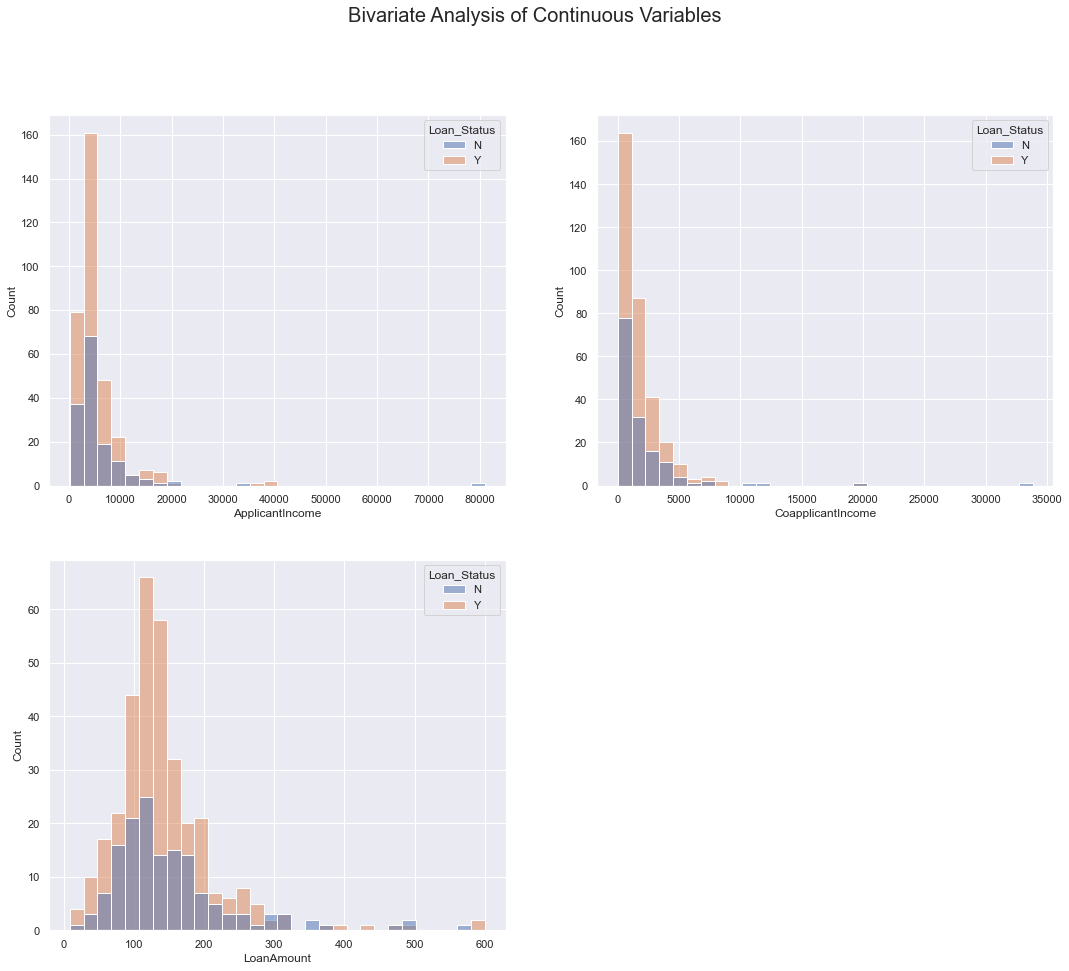

In [4]:
fig, axes = plt.subplots(2, 2, figsize=(18, 15))
fig.suptitle('Bivariate Analysis of Continuous Variables', fontsize=20)

sns.histplot(ax=axes[0,0], data=insurance.dropna(), x='ApplicantIncome', hue='Loan_Status', bins=30)
sns.histplot(ax=axes[0,1], data=insurance.dropna(), x='CoapplicantIncome', hue='Loan_Status',bins=30)

sns.histplot(ax=axes[1,0], data=insurance.dropna(), x='LoanAmount', hue='Loan_Status',bins=30)
fig.delaxes(axes[1][1])
plt.show()

The `LoanAmount` is the closest to being normally distributed although it still has outliers. The rest of the continuous variables are skewed and have plenty of outliers. Using `Loan_Status` column to add another layer to the graphs, it can be seen that the each variable is similarly distributed when segregated by `Loan_Status = Y` and `Loan_Status = N`. 

The outliers in the continuous variables are showed in the boxplot below.

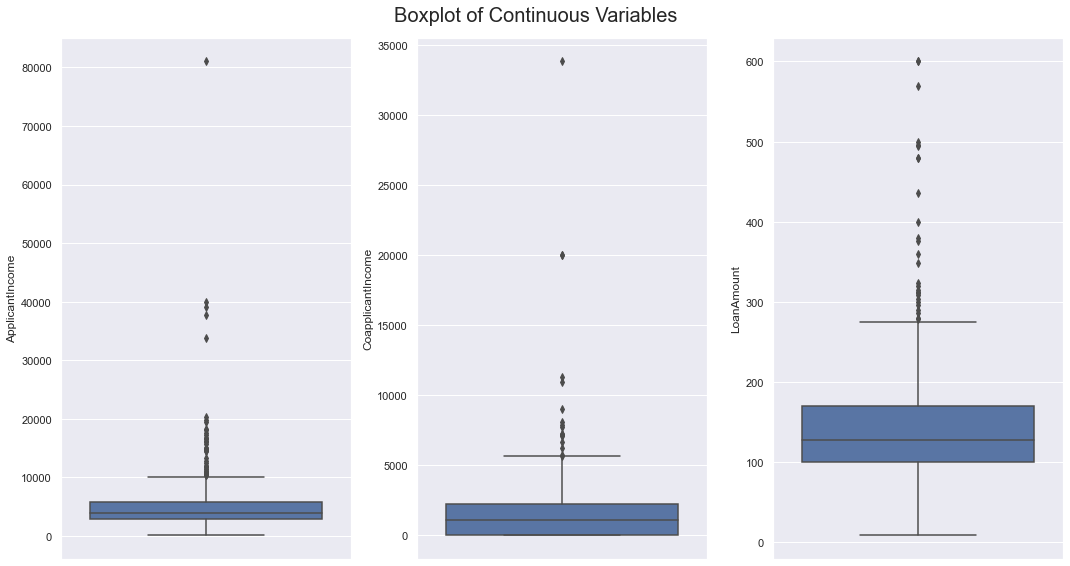

In [5]:
fig, axes = plt.subplots(1, 3, figsize=(15, 8))
fig.suptitle('Boxplot of Continuous Variables', fontsize=20)

sns.boxplot(ax=axes[0], data=insurance.dropna(), y='ApplicantIncome')
sns.boxplot(ax=axes[1], data=insurance.dropna(), y='CoapplicantIncome')

sns.boxplot(ax=axes[2], data=insurance.dropna(), y='LoanAmount')
# fig.delaxes(axes[1][1])
fig.tight_layout(pad=1.0)
plt.show()

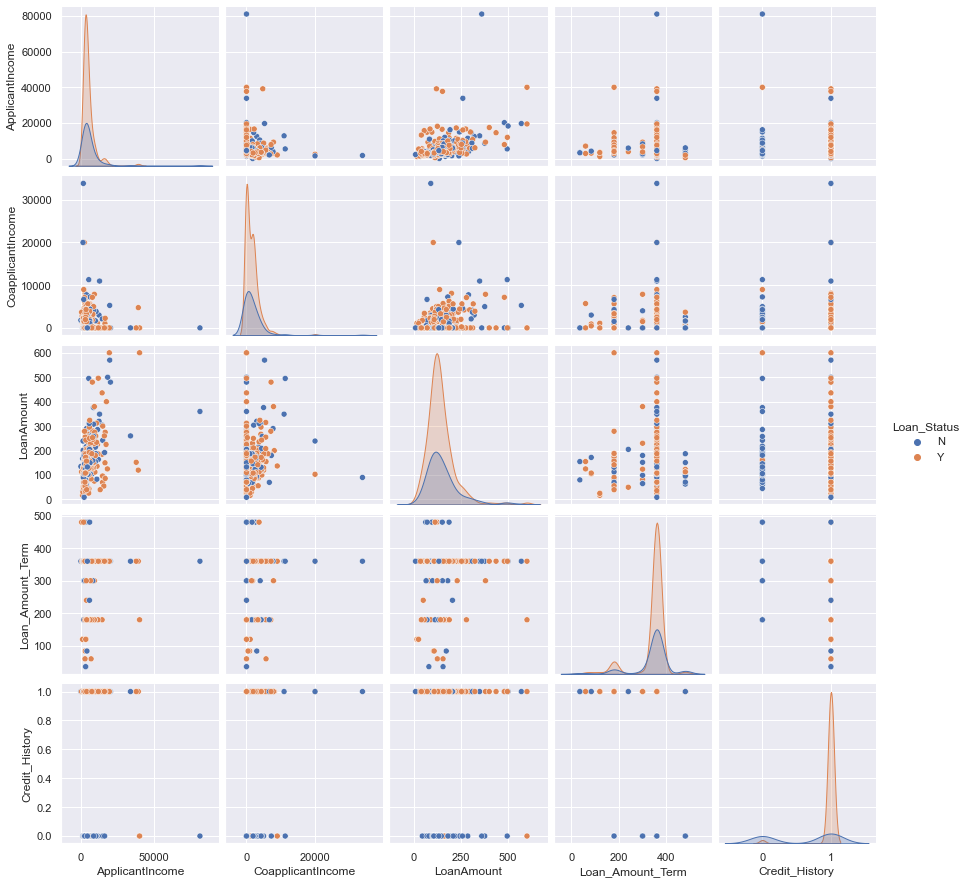

In [6]:
sns.pairplot(data=insurance.dropna(), hue='Loan_Status')

plt.show()

The pair plot above shows some correlation between `LoanAmount` and `ApplicantIncome`and `LoanAmount` and `CoapplicantIncome`. Adding the `Loan_Status` as hue to the graph did not reveal anything of significance except for the `Credit_History` where it can be seen that having `Credit_History = 0` is highly associated with `Loan_Status = No` and having `Credit_History = 1` is highly associated with `Loan_Status = Yes`.

### Discrete Variables

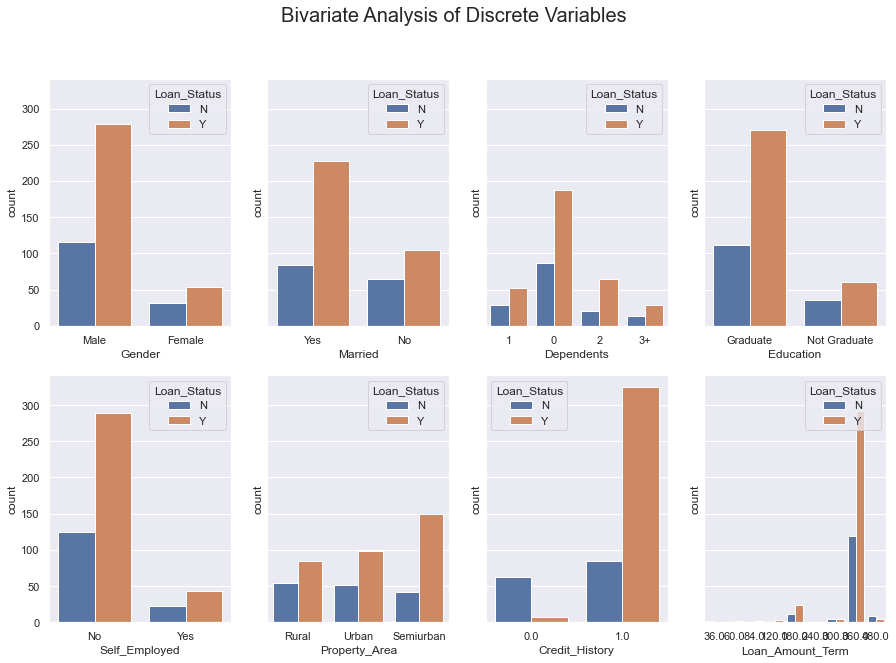

In [7]:
fig, axes = plt.subplots(2, 4, figsize=(15, 10), sharey=True)
fig.suptitle('Bivariate Analysis of Discrete Variables', fontsize=20)

sns.countplot(ax=axes[0,0], data=insurance.dropna(), x='Gender', hue='Loan_Status')
sns.countplot(ax=axes[0,1], data=insurance.dropna(), x='Married', hue='Loan_Status')
sns.countplot(ax=axes[0,2], data=insurance.dropna(), x='Dependents', hue='Loan_Status')
sns.countplot(ax=axes[0,3], data=insurance.dropna(), x='Education', hue='Loan_Status')

sns.countplot(ax=axes[1,0], data=insurance.dropna(), x='Self_Employed', hue='Loan_Status')
sns.countplot(ax=axes[1,1], data=insurance.dropna(), x='Property_Area', hue='Loan_Status')
sns.countplot(ax=axes[1,2], data=insurance.dropna(), x='Credit_History', hue='Loan_Status')
sns.countplot(ax=axes[1,3], data=insurance.dropna(), x='Loan_Amount_Term', hue='Loan_Status')

plt.show()

The graph shows that a lot of applicants having the following characteristics were approved of their loans:

- Gender: **Male**
- Married: **Yes**
- Dependents: **0**
- Education: **Graduate**
- Self_Employed: **No**
- Property_Area: **Semiurban**
- Credit_History: **1**
- Loan_Amount_Term: **360**

However, we still don't know if this difference is statistically significant since there are also more applicants who have the afore mentioned characteristics. For example, there are more male applicants than female. Males are more likely to be approved of their loans just because there are more male applicants. This is more clearly seen if the numbers are expressed as percentages as shown in the cross table below:

In [8]:
pd.crosstab(insurance.Loan_Status, insurance.Gender, normalize='columns').round(4)*100

Gender,Female,Male
Loan_Status,,
N,33.04,30.67
Y,66.96,69.33


We see that 67% and 69% of female and male applicants, respectively, have `Loan_Status = Y`. The difference in percentages is not significant enough to conclude that male applicants are granted loans more often than females. 

This explanation is also true to the other variables: `Married`, `Dependents`, `Education`, `Self_Employed`, and `Property_Area`. However, this does not apply to `Credit_History` where the difference between the number of `Loan_Status = Y` and `Loan_Status = N` is overwhelming.

In [9]:
pd.crosstab(insurance.Loan_Status, insurance.Credit_History, normalize='columns').round(4)*100

Credit_History,0.0,1.0
Loan_Status,,
N,92.13,20.42
Y,7.87,79.58


92% of loan applications without credit history (Credit_History = 0) were not approved and 80% of loan applications with credit history (Credit_History = 1 were approved. We can see already that `Credit_History` is a good predictor of `Loan_Status`.

In [10]:
insurance['Loan_Amount_Term'].value_counts(normalize=True).round(4)*100

360.0    85.33
180.0     7.33
480.0     2.50
300.0     2.17
240.0     0.67
84.0      0.67
120.0     0.50
60.0      0.33
36.0      0.33
12.0      0.17
Name: Loan_Amount_Term, dtype: float64

Looking at the `Loan_Amount_Term`, 85% of all applications have 360-month `Loan_Amount_Term`. There are nine more `Loan_Amount_Term` options but they are significantly less popular than the 360-month term. 

## Data Cleaning, Imputation and Preprocessing

In [11]:
for col in insurance.select_dtypes(include='object').columns:
    print(col, insurance.select_dtypes(include='object')[col].unique())

Gender ['Male' 'Female' nan]
Married ['No' 'Yes' nan]
Dependents ['0' '1' '2' '3+' nan]
Education ['Graduate' 'Not Graduate']
Self_Employed ['No' 'Yes' nan]
Property_Area ['Urban' 'Rural' 'Semiurban']
Loan_Status ['Y' 'N']


In [12]:
code_numeric = {
    'Male':1,
    'Female':0,
    'Graduate':1,
    'Not Graduate':0,
    'Yes':1,
    'No':0,
    'Y':1,
    'N':0
}

insurance = insurance.applymap(lambda x: code_numeric.get(x) if x in code_numeric else x)
test = test.applymap(lambda x: code_numeric.get(x) if x in code_numeric else x)
insurance.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0,1,0.0,5849,0.0,NaN,360.0,1.0,Urban,1
1,1.0,1.0,1,1,0.0,4583,1508.0,128.0,360.0,1.0,Rural,0
2,1.0,1.0,0,1,1.0,3000,0.0,66.0,360.0,1.0,Urban,1
3,1.0,1.0,0,0,0.0,2583,2358.0,120.0,360.0,1.0,Urban,1
4,1.0,0.0,0,1,0.0,6000,0.0,141.0,360.0,1.0,Urban,1


In [13]:
mapp_dep = {'0':0,'1':1,'2':1,'3+':1}
mapp_lt = {
    360.0: '360', 
    180.0: 'other', 
    480.0: 'other', 
    300.0: 'other', 
    84.0: 'other', 
    240.0: 'other', 
    120.0: 'other', 
    36.0: 'other', 
    60.0: 'other', 
    12.0: 'other'
}

insurance['Dependents'] = insurance['Dependents'].map(mapp_dep)
insurance['Loan_Amount_Term'] = insurance['Loan_Amount_Term'].map(mapp_lt)

test['Dependents'] = test['Dependents'].map(mapp_dep)
test['Loan_Amount_Term'] = test['Loan_Amount_Term'].map(mapp_lt)

insurance.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,1,0.0,5849,0.0,NaN,360,1.0,Urban,1
1,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360,1.0,Rural,0
2,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360,1.0,Urban,1
3,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360,1.0,Urban,1
4,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360,1.0,Urban,1


In [14]:
for col in insurance.select_dtypes(include='object').columns:
    print(col, insurance.select_dtypes(include='object')[col].unique())

Loan_Amount_Term ['360' 'other' nan]
Property_Area ['Urban' 'Rural' 'Semiurban']


#### Missing Values

In [15]:
null_count = insurance.isnull().sum()

In [16]:
percentage = insurance.isnull().sum()*100/insurance.shape[0]

In [17]:
pd.concat([null_count, percentage], axis=1, keys=['null_count','percentage']).sort_values(by='percentage',ascending=False)

,null_count,percentage
Credit_History,50,8.143322
Self_Employed,32,5.211726
LoanAmount,22,3.583062
Dependents,15,2.442997
Loan_Amount_Term,14,2.280130
Gender,13,2.117264
Married,3,0.488599
Education,0,0.000000
ApplicantIncome,0,0.000000
CoapplicantIncome,0,0.000000


In [18]:
insurance.Loan_Amount_Term.unique()

array(['360', 'other', nan], dtype=object)

In [19]:
# fill missing `Gender` values with the mode
insurance.Gender.fillna(insurance.Gender.mode()[0],inplace=True)
test.Gender.fillna(test.Gender.mode()[0],inplace=True)

# fill missing `Married` values with the mode
insurance.Married.fillna(insurance.Married.mode()[0],inplace=True)
test.Married.fillna(test.Married.mode()[0],inplace=True)

# fill missing `Dependents` values with the mode
insurance.Dependents.fillna(insurance.Dependents.mode()[0],inplace=True)
test.Dependents.fillna(test.Dependents.mode()[0],inplace=True)

# fill missing `Self_Employed` values with the mode
insurance.Self_Employed.fillna(insurance.Self_Employed.mode()[0],inplace=True)
test.Self_Employed.fillna(test.Self_Employed.mode()[0],inplace=True)

# fill missing `LoanAmount` values with the median
insurance.LoanAmount.fillna(insurance.LoanAmount.median(),inplace=True)
test.LoanAmount.fillna(test.LoanAmount.median(),inplace=True)

# fill missing `Loan_Amount_Term` values with the mode
insurance.Loan_Amount_Term.fillna(insurance.Loan_Amount_Term.mode()[0],inplace=True)
test.Loan_Amount_Term.fillna(test.Loan_Amount_Term.mode()[0],inplace=True)

# fill missing `Credit_History` values with the mode
insurance.Credit_History.fillna(insurance.Credit_History.mode()[0],inplace=True)
test.Credit_History.fillna(test.Credit_History.mode()[0],inplace=True)

In [20]:
insurance.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [21]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    float64
 1   Married            614 non-null    float64
 2   Dependents         614 non-null    float64
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    float64
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    object 
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    int64  
dtypes: float64(7), int64(3), object(2)
memory usage: 57.7+ KB


In [22]:
insurance = insurance.astype(dtype={
    'Gender':'int32', 
    'Married':'int32', 
    'Dependents':'int32',
    'Education':'int32',
    'Self_Employed':'int32',
    'Credit_History':'int32'
})

test = test.astype(dtype={
    'Gender':'int32', 
    'Married':'int32', 
    'Dependents':'int32',
    'Education':'int32',
    'Self_Employed':'int32',
    'Credit_History':'int32'
})
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int32  
 1   Married            614 non-null    int32  
 2   Dependents         614 non-null    int32  
 3   Education          614 non-null    int32  
 4   Self_Employed      614 non-null    int32  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    object 
 9   Credit_History     614 non-null    int32  
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    int64  
dtypes: float64(2), int32(6), int64(2), object(2)
memory usage: 43.3+ KB


In [23]:
insurance.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,5849,0.0,128.0,360,1,Urban,1
1,1,1,1,1,0,4583,1508.0,128.0,360,1,Rural,0
2,1,1,0,1,1,3000,0.0,66.0,360,1,Urban,1
3,1,1,0,0,0,2583,2358.0,120.0,360,1,Urban,1
4,1,0,0,1,0,6000,0.0,141.0,360,1,Urban,1


In [24]:
def dummify(data, columns):
    for col in columns:
        x = pd.get_dummies(data[col],prefix=col,drop_first=True)
        data = data.drop(col, 1)
        data = pd.concat([data, x], axis=1)
    return data

In [25]:
insurance = dummify(insurance,['Property_Area','Loan_Amount_Term'])
test = dummify(test,['Property_Area','Loan_Amount_Term'])

C:\Users\myntad\AppData\Local\Temp/ipykernel_6000/921537213.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data = data.drop(col, 1)


In [26]:
insurance.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Loan_Status,Property_Area_Semiurban,Property_Area_Urban,Loan_Amount_Term_other
0,1,0,0,1,0,5849,0.0,128.0,1,1,0,1,0
1,1,1,1,1,0,4583,1508.0,128.0,1,0,0,0,0
2,1,1,0,1,1,3000,0.0,66.0,1,1,0,1,0
3,1,1,0,0,0,2583,2358.0,120.0,1,1,0,1,0
4,1,0,0,1,0,6000,0.0,141.0,1,1,0,1,0


### Class Imbalance

In [27]:
insurance.Loan_Status.value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [28]:
loan_stat_0 = insurance[insurance['Loan_Status'] == 0]

In [29]:
loan_stat_0.sample(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Loan_Status,Property_Area_Semiurban,Property_Area_Urban,Loan_Amount_Term_other
78,1,1,1,1,0,3167,4000.0,180.0,0,0,1,0,1
139,1,1,1,0,0,4200,1430.0,129.0,1,0,0,0,0
181,1,0,0,1,0,1916,5063.0,67.0,1,0,0,0,0


In [30]:
insurance_balanced = pd.concat([insurance, loan_stat_0], axis=0)

In [31]:
insurance_balanced = pd.concat([insurance_balanced, loan_stat_0.sample(422-384)], axis=0)

In [32]:
insurance_balanced.Loan_Status.value_counts()

1    422
0    422
Name: Loan_Status, dtype: int64

In [33]:
insurance_balanced.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Loan_Status,Property_Area_Semiurban,Property_Area_Urban,Loan_Amount_Term_other
0,1,0,0,1,0,5849,0.0,128.0,1,1,0,1,0
1,1,1,1,1,0,4583,1508.0,128.0,1,0,0,0,0
2,1,1,0,1,1,3000,0.0,66.0,1,1,0,1,0
3,1,1,0,0,0,2583,2358.0,120.0,1,1,0,1,0
4,1,0,0,1,0,6000,0.0,141.0,1,1,0,1,0


### X and Y

In [34]:
insurance_balanced.head(1)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Loan_Status,Property_Area_Semiurban,Property_Area_Urban,Loan_Amount_Term_other
0,1,0,0,1,0,5849,0.0,128.0,1,1,0,1,0


In [35]:
# X = insurance_balanced.drop('Loan_Status', axis=1)
# y = insurance_balanced['Loan_Status']

X = insurance.drop('Loan_Status', axis=1)
y = insurance['Loan_Status']

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [37]:
X_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area_Semiurban,Property_Area_Urban,Loan_Amount_Term_other
90,1,1,0,1,0,2958,2900.0,131.0,1,1,0,0
533,1,0,1,1,0,11250,0.0,196.0,1,1,0,0
452,1,1,0,1,0,3948,1733.0,149.0,0,0,0,0
355,0,0,0,1,0,3813,0.0,116.0,1,0,1,1
266,1,1,1,1,0,4708,1387.0,150.0,1,1,0,0


## Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression
classifier_LR = LogisticRegression(max_iter=200)
classifier_LR.fit(X_train, y_train)

y_pred_LR = classifier_LR.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
cm = confusion_matrix(y_test, y_pred_LR)
print(cm)
print('Accuracy:', accuracy_score(y_test, y_pred_LR))
print('F1 Score:', f1_score(y_test, y_pred_LR))
print('Precision:', precision_score(y_test, y_pred_LR))
print('Recall:', recall_score(y_test, y_pred_LR))

[[15 18]
 [ 2 88]]
Accuracy: 0.8373983739837398
F1 Score: 0.8979591836734695
Precision: 0.8301886792452831
Recall: 0.9777777777777777


## K-Nearest Neighbors

In [38]:
from sklearn.neighbors import KNeighborsClassifier
classifier_KNN = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2)
classifier_KNN.fit(X_train, y_train)

y_pred_KNN = classifier_KNN.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
cm = confusion_matrix(y_test, y_pred_KNN)
print(cm)
print('Accuracy:', accuracy_score(y_test, y_pred_KNN))
print('F1 Score:', f1_score(y_test, y_pred_KNN))
print('Precision:', precision_score(y_test, y_pred_KNN))
print('Recall:', recall_score(y_test, y_pred_KNN))

[[ 6 27]
 [22 68]]
Accuracy: 0.6016260162601627
F1 Score: 0.7351351351351352
Precision: 0.7157894736842105
Recall: 0.7555555555555555


## Support Vector Machine

In [39]:
from sklearn.svm import SVC
classifier_SVM = SVC(kernel = 'linear', random_state = 0)
classifier_SVM.fit(X_train, y_train)

y_pred_SVM = classifier_SVM.predict(X_test)

cm = confusion_matrix(y_test, y_pred_SVM)
print(cm)
print('Accuracy:', accuracy_score(y_test, y_pred_SVM))
print('F1 Score:', f1_score(y_test, y_pred_SVM))
print('Precision:', precision_score(y_test, y_pred_SVM))
print('Recall:', recall_score(y_test, y_pred_SVM))

[[14 19]
 [ 2 88]]
Accuracy: 0.8292682926829268
F1 Score: 0.8934010152284264
Precision: 0.822429906542056
Recall: 0.9777777777777777


## Support Vector Machine - Kernel

In [40]:
from sklearn.svm import SVC
classifier_Kernel = SVC(kernel = 'rbf', random_state = 0)
classifier_Kernel.fit(X_train, y_train)

y_pred_Kernel = classifier_Kernel.predict(X_test)

cm = confusion_matrix(y_test, y_pred_Kernel)
print(cm)
print('Accuracy:', accuracy_score(y_test, y_pred_Kernel))
print('F1 Score:', f1_score(y_test, y_pred_Kernel))
print('Precision:', precision_score(y_test, y_pred_Kernel))
print('Recall:', recall_score(y_test, y_pred_Kernel))

[[ 0 33]
 [ 0 90]]
Accuracy: 0.7317073170731707
F1 Score: 0.8450704225352113
Precision: 0.7317073170731707
Recall: 1.0


## Naive Bayes

In [41]:
from sklearn.naive_bayes import GaussianNB
classifier_NB = GaussianNB()
classifier_NB.fit(X_train, y_train)

y_pred_NB = classifier_NB.predict(X_test)

cm = confusion_matrix(y_test, y_pred_NB)
print(cm)
print('Accuracy:', accuracy_score(y_test, y_pred_NB))
print('F1 Score:', f1_score(y_test, y_pred_NB))
print('Precision:', precision_score(y_test, y_pred_NB))
print('Recall:', recall_score(y_test, y_pred_NB))

[[15 18]
 [ 3 87]]
Accuracy: 0.8292682926829268
F1 Score: 0.8923076923076922
Precision: 0.8285714285714286
Recall: 0.9666666666666667


## Decision Tree

In [43]:
from sklearn.tree import DecisionTreeClassifier
classifier_D3 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier_D3.fit(X_train, y_train)

y_pred_D3 = classifier_D3.predict(X_test)

cm = confusion_matrix(y_test, y_pred_D3)
print(cm)
print('Accuracy:', accuracy_score(y_test, y_pred_D3))
print('F1 Score:', f1_score(y_test, y_pred_D3))
print('Precision:', precision_score(y_test, y_pred_D3))
print('Recall:', recall_score(y_test, y_pred_D3))

[[21 12]
 [24 66]]
Accuracy: 0.7073170731707317
F1 Score: 0.7857142857142856
Precision: 0.8461538461538461
Recall: 0.7333333333333333


## Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier
classifier_RF = RandomForestClassifier(n_estimators = 150, criterion = 'entropy', random_state = 0)
classifier_RF.fit(X_train, y_train)

y_pred_RF = classifier_RF.predict(X_test)

cm = confusion_matrix(y_test, y_pred_RF)
print(cm)
print('Accuracy:', accuracy_score(y_test, y_pred_RF))
print('F1 Score:', f1_score(y_test, y_pred_RF))
print('Precision:', precision_score(y_test, y_pred_RF))
print('Recall:', recall_score(y_test, y_pred_RF))

[[15 18]
 [ 5 85]]
Accuracy: 0.8130081300813008
F1 Score: 0.8808290155440415
Precision: 0.8252427184466019
Recall: 0.9444444444444444


In [45]:
predictions_final = classifier_RF.predict(test)

predictions_final2 = []
for i in predictions_final:
    if i == 1:
        predictions_final2.append('Y')
    else:
        predictions_final2.append('N')
        
print(predictions_final2)

['Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'Y',

In [46]:
submit = pd.read_csv('sample_submission.csv')

submit.Loan_Status = predictions_final2
submit.to_csv('submit.csv',index=False)
submit.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,N
